# Assignment 3
## JuPyter Notebook - Verschuur L. 1811053, Kolenbrander M. 1653415

In [7]:
from utility_functions import *

## Parameters

# Convert numeric values into ranged representations
convert_to_range = True
# Represent ranges as categorical values or rounded to nearest base value: 12, b=5 -> 10-14
range_categorical = False
# Convert categorical values (not from ranged values) into one hot representations:
# {'smoking': ['sometimes', 'regularly', 'sometimes', 'never']} -> 
# {'smoking_sometimes': [1, 0, 1, 0], 'smoking_regularly': [0, 1, 0, 0], 'smoking_never': [0, 0, 0, 1]}
convert_categorical_to_one_hot = True

## Data fetching & Data pre-processing

In [16]:
import pandas as pd
import numpy as np

file_path = "healthcare-dataset-stroke-data.csv"

# Fetching CSV and converting to data frame
data_file = pd.read_csv(file_path, header=0)

# Drop all entries with nan values
data_file = data_file.dropna()

# Convert interval and ratio variables into ranges
if convert_to_range and range_categorical:
    data_file.insert(data_file.columns.get_loc("age"), "ranged_age", [floor_range(age, 20) for age in data_file["age"]])
    data_file.insert(data_file.columns.get_loc("avg_glucose_level"), "ranged_avg_glucose_level", [floor_range(avg_glucose_level, 30) for avg_glucose_level in data_file["avg_glucose_level"]])
    data_file.insert(data_file.columns.get_loc("bmi"), "ranged_bmi", [floor_range(bmi, 2) for bmi in data_file["bmi"]])
elif convert_to_range and not range_categorical:
    data_file.insert(data_file.columns.get_loc("age"), "ranged_age", [round_to_base(age, 20) for age in data_file["age"]])
    data_file.insert(data_file.columns.get_loc("avg_glucose_level"), "ranged_avg_glucose_level", [round_to_base(avg_glucose_level, 30) for avg_glucose_level in data_file["avg_glucose_level"]])
    data_file.insert(data_file.columns.get_loc("bmi"), "ranged_bmi", [round_to_base(bmi, 2) for bmi in data_file["bmi"]])

data_file.insert(data_file.columns.get_loc("bmi"), "rounded_bmi", data_file["bmi"].round(0))
    
# Convert "boolean" variables into true boolean variables
data_file["hypertension"] = data_file["hypertension"].astype("bool")
data_file["heart_disease"] = data_file["heart_disease"].astype("bool")
data_file["stroke"] = data_file["stroke"].astype("bool")
data_file["ever_married"] = np.where(data_file["ever_married"] == "Yes", True, False).astype("bool")
    
# Convert categorical variables into a one-hot representation
if convert_categorical_to_one_hot:
    data_file = pd.concat([data_file, pd.get_dummies(data_file["gender"], prefix="gender")], axis=1)
    data_file = pd.concat([data_file, pd.get_dummies(data_file["work_type"], prefix="work_type")], axis=1)
    data_file = pd.concat([data_file, pd.get_dummies(data_file["Residence_type"], prefix="Residence_type")], axis=1)
    data_file = pd.concat([data_file, pd.get_dummies(data_file["smoking_status"], prefix="smoking_status")], axis=1)
    
data_file.head()

,id,gender,ranged_age,age,hypertension,heart_disease,ever_married,work_type,Residence_type,ranged_avg_glucose_level,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,60,67.0,False,True,True,Private,Urban,240,...,0,1,0,0,0,1,0,1,0,0
2,31112,Male,80,80.0,False,True,True,Private,Rural,120,...,0,1,0,0,1,0,0,0,1,0
3,60182,Female,40,49.0,False,False,True,Private,Urban,180,...,0,1,0,0,0,1,0,0,0,1
4,1665,Female,80,79.0,True,False,True,Self-employed,Rural,180,...,0,0,1,0,1,0,0,0,1,0
5,56669,Male,80,81.0,False,False,True,Private,Urban,180,...,0,1,0,0,0,1,0,1,0,0


## Visualization

### Preparing the data
**Applied algorithms on this dataset**
- SKLearn Principal component analysis
- SKLearn Locally Linear Embedding
- SKLearn T-distributed Stochastic Neighbor Embedding

In [17]:
from sklearn.preprocessing import StandardScaler

# Decision Variables
x = data_file.loc[:,["ranged_age", "hypertension", "heart_disease", "ever_married", "ranged_avg_glucose_level", "rounded_bmi", *fetch_columns_on_name_list(data_file, ["work_type"])]].values

x = StandardScaler().fit_transform(x)

feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
normalised_data = pd.DataFrame(x, columns=feat_cols)

### Creation of PCA components

In [18]:
from sklearn.decomposition import PCA

PCA_construct = PCA(n_components=2)
pca_data = PCA_construct.fit_transform(x)

# Decision Variables
pca_data_df = pd.DataFrame(data = pca_data, columns = ['principal component 1', 'principal component 2'])
# Target Variable
target_data_df = pd.DataFrame(data = data_file["stroke"])

#Concatenated dataframe for use
pca_final_df = pd.concat([pca_data_df, target_data_df], axis = 1)

#### Visualize the PCA data

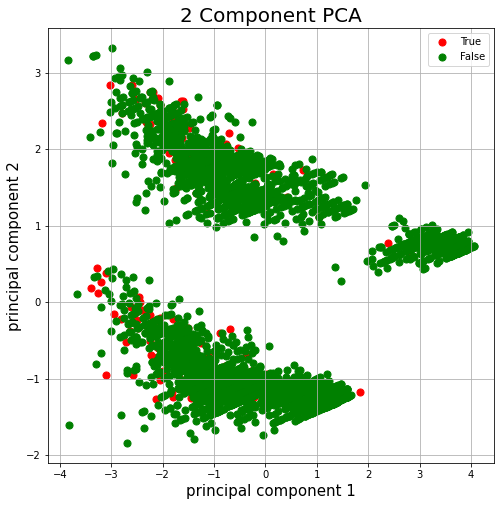

In [19]:
plot_result(pca_final_df, "principal component 1", "principal component 2", "stroke", "2 Component PCA")

### Creation of LLE components

In [20]:
from sklearn.manifold import LocallyLinearEmbedding

LLE_construct = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
lle_data = LLE_construct.fit_transform(x)

# Decision Variables
lle_data_df = pd.DataFrame(data = lle_data, columns = ['LLE component 1', 'LLE component 2'])
# Target Variable
target_data_df = pd.DataFrame(data = data_file["stroke"])

#Concatenated dataframe for use
lle_final_df = pd.concat([lle_data_df, target_data_df], axis = 1)

#### Visualize the LLE data

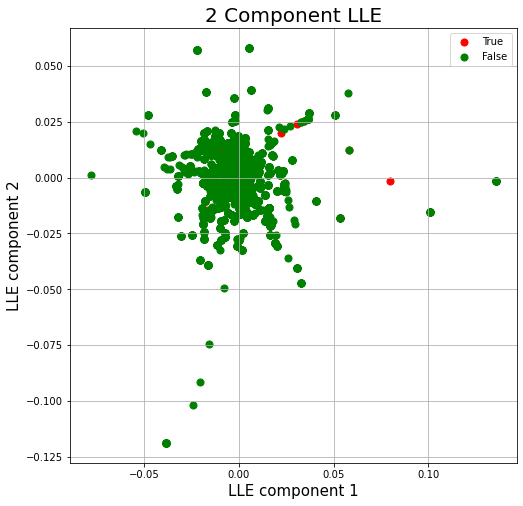

In [21]:
plot_result(lle_final_df, "LLE component 1", "LLE component 2", "stroke", "2 Component LLE")

### Creation of t-SNE components

In [22]:
from sklearn.manifold import TSNE

TSNE_construct = TSNE(n_components=2)
tsne_data = TSNE_construct.fit_transform(x)

# Decision Variables
tsne_data_df = pd.DataFrame(data = tsne_data, columns = ['t-sne component 1', 't-sne component 2'])
# Target Variable
target_data_df = pd.DataFrame(data = data_file["stroke"])

#Concatenated dataframe for use
tsne_final_df = pd.concat([tsne_data_df, target_data_df], axis = 1)

#### Visualize the t-sne data

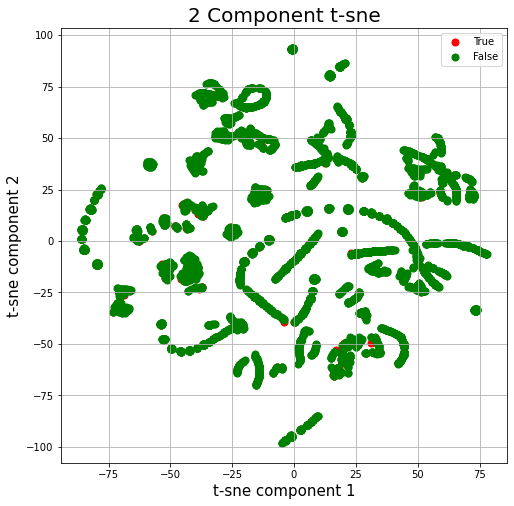

In [23]:
plot_result(tsne_final_df, "t-sne component 1", "t-sne component 2", "stroke", "2 Component t-sne")